# Introduction to the Lennard-Jones potential

*Authors: Enze Chen (University of California, Berkeley)*

In computational materials science, we are often concerned with simulating the properties and behaviors of materials.
In order to do this effectively, we need, among many other things, a way to evaluate the energy of our computational system.
That is, given a configuration of atoms (the elements and where they're placed), what is the energy of the system due to the combination of attractive/repulsive forces that they exert on each other?
This is the starting point for virtually all other calculations (forces, ground state, elastic properties, etc.).
And the mathematical construct that provides this evaluation of the system's energy is known as the **interatomic potential** (IAP).

## How to use this notebook

If you are viewing this notebook on [Google Colaboratory](https://colab.research.google.com/github/enze-chen/learning_modules/blob/master/mse/lennard-jones_potential.ipynb), then everything is already set up for you (hooray). 
If you want to save a copy of this notebook for yourself, go to "File > Save a copy in Drive" and you will find it in your Google Drive account under "My Drive > Colab Notebooks." 
If you want to run the notebook locally, you can download it and make sure all the Python modules in the [`requirements.txt`](https://github.com/enze-chen/learning_modules/blob/master/requirements.txt) file are installed before running it.

To run this notebook, run all the cells (e.g. `Runtime > Run all` in the menu) and then adjust the sliders at the bottom. 
I **strongly recommend** just running the code and experimenting with the inputs _before_ reading the code in great detail.

## Introduction

Depending on the desired level of accuracy and sophistication, there are many different forms for this IAP. 
In class, we saw an example of an IAP of the form:

$$ E = E_{\text{attract}} + E_{\text{repel}} = -\frac{A}{r} + \frac{B}{r^n} $$

which is fine.
There's another *extremely popular and famous* IAP that is used to model [van der Waals interactions](https://en.wikipedia.org/wiki/Van_der_Waals_force), and this IAP is called the **Lennard-Jones (LJ) potential**, named after [Sir John Edward Lennard-Jones](https://en.wikipedia.org/wiki/John_Lennard-Jones).
If you read [his original paper](https://royalsocietypublishing.org/doi/abs/10.1098/rspa.1924.0082) from 1924, you'll notice that his last name there is only "Jones;" that's because he got married in 1925 and only then added his wife's last name "Lennard" to his own.
In any case, the equation for the most common formulation of the Lennard-Jones IAP is:

$$ V(r) = 4 \varepsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right] \tag{1} $$

where $r$ is the distance between two particles, $\varepsilon$ is the depth of the potential well, and $\sigma$ is an interaction distance.
Equation 1 is also called the **12-6 potential** due to the exponents.
This model has two free parameters, $\varepsilon$ (epsilon) and $\sigma$ (sigma), which can be fit to data depending on the system we wish to model.
Different values for $\varepsilon$ and $\sigma$ for different systems will lead to different behavior in the simulations.
So let's see what happens when we vary these parameters!

In [93]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, FloatSlider, Layout

def plot_lj(e, s):
    r = np.linspace(0.5, 10, 1000)
    
    # compute repulsive and attractive terms in 12-6 LJ potential
    E_rep = 4 * e * (s / r) ** 12
    E_att = - 4 * e * (s / r) ** 6
    V = E_rep + E_att
    
    # compute forces
    F = -np.gradient(V, r)
    
    # Plotting and finer styling
    plt.rcParams.update({'figure.figsize':(8,6), 'font.size':22, 'axes.linewidth':2, 'lines.linewidth':5,
                         'mathtext.fontset':'cm'})
    fig, ax = plt.subplots()
    ax.plot(r, 0*np.ones(r.shape), 'k--', lw=3, alpha=0.4, zorder=-5)
    ax.plot(r, V, 'k', label='12-6 LJ', zorder=10)
    ax.plot(r, E_rep, ls='dashed', lw=4, alpha=0.6, label='repulsive')
    ax.plot(r, E_att, ls='dashed', lw=4, alpha=0.6, label='attractive')
    ax.plot(r, F, alpha=0.8, label='force')
    ax.set_xlim(1.5, 4)
    ax.set_ylim(-3.99, 4.99)
    ax.set_xlabel('$r$ (a.u.)')
    ax.set_ylabel('Energy (a.u.)')
    ax.legend(loc='upper right')
    plt.show()

In [94]:
e_widget = FloatSlider(value=2, min=1, max=3, step=0.02, 
                       description=r'$\varepsilon$', readout_format='.2f', 
                       style={'description_width':'20px'}, continuous_update=False,
                       layout=Layout(width='300px', height='30px'))
s_widget = FloatSlider(value=2.1, min=2, max=2.2, step=0.01, 
                       description=r'$\sigma$', readout_format='.2f', 
                       style={'description_width':'20px'}, continuous_update=False,
                       layout=Layout(width='300px', height='30px'))
interact(plot_lj, e=e_widget, s=s_widget);

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='$\\varepsilon$', layout=Lay…

## Food for thought

- What happens when you adjust $\varepsilon$? What about $\sigma$?
- Where does the energy equal 0? What about the force?
- Which interaction dominates at short distances? At long distances?
- How did we compute the forces?

## OK, but how do we _use_ it?

Yeah, good question.
Now that we have an understanding of all of the parameters in the LJ potential, we can just throw the LJ potential into, for example, a [molecular dynamics (MD)](https://en.wikipedia.org/wiki/Molecular_dynamics) simulation, which is more or less the numerical implementation of Newton's laws of motion at the atomic level.
The LJ potential is what tells the system how to interact (e.g., two atoms are too close—move away!).
After setting up the simulation cell and running it, we can stitch the results into a little movie like [the following example](https://www.youtube.com/watch?v=bN2VV2gOLAw):

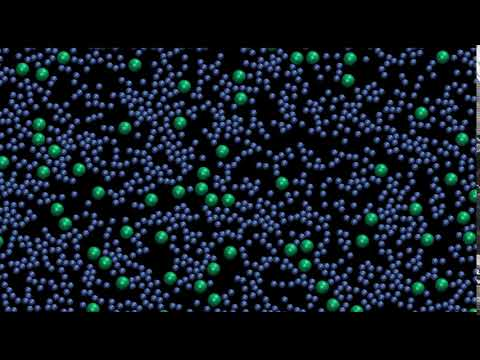

In [95]:
from IPython.display import YouTubeVideo
YouTubeVideo('bN2VV2gOLAw')